### Imports

Note:
- pandas >= 0.25.1
- numpy >= 1.17.2
- sklearn >= 0.22.1

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

### Write Array to File

In [40]:
def write_results(res_array, filename):
    with open(filename, 'w') as f:
        for item in res_array:
            f.write("%s\n" % item)

### Load Dataset

In [ ]:
import pandas as pd

df = pd.read_csv('filename.csv', header=None)

# df.head(5)   # --> check first 5 rows
# df.columns=['a','b','c'] # --> replace column names

### Handle Missing Data (https://towardsdatascience.com/working-with-missing-values-in-pandas-5da45d16e74)

In [7]:
df.dtypes() # --> check types for each columns (look for 'objects' type)
# df['columns'].unique # --> print unique values in this column

df.info() # --> dataframe info, missing data, etc
# df.describe() # --> summary of dataframe

df.isnull().sum() --> for NaN or None
# len(df.loc[(df['column1']=='?') | (df['column2']=='?')])  --> for masked missing value

# 1. Delete rows with missing values
# df_drop_missing_values = df.dropna(axis=0dropna(axis=0, how=’any’, thresh=None, subset=None, inplace=False))

# 2. Replace missing values with mean
# df['column'] = df['column'].fillna(value=df['column'].mean(), inplace=True)

### Formatting Data

In [ ]:
#  1. One Hot Encoding
# data_encoded = pd.get_dummies(df, columns['col1', 'col2'])

In [ ]:
# 2. Split data and target
# X = df.drop(columns=['target']).copy()
# y = df['target'].copy()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
### Build Classifier
# 1. DecisionTree
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

In [6]:
### Evaluation
plot_confusion_matrix(clf_dt, X_test, y_test)

In [1]:
# 2. XGBoost   # https://towardsdatascience.com/a-beginners-guide-to-xgboost-87f5d4c30ed7
from sklearn import datasets
import xgboost as xgb

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [133]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1)
D_train = xgb.DMatrix(X_train, label=Y_train)
D_test = xgb.DMatrix(X_test, label=Y_test)

param = {
    'eta': 0.2, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 10  # The number of training iterations
model = xgb.train(param, D_train, steps)

In [135]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(Y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(Y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(Y_test, best_preds)))

Precision = 1.0
Recall = 1.0
Accuracy = 1.0


### XGBoost K-Fold Cross Validation

In [125]:
# k-fold cross validation evaluation of xgboost model
import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target


param = {
    'eta': 0.23, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3,
    'booster': 'gbtree'} 
# model = xgb.train(param, D_train, steps)

# CV model
model = xgboost.XGBClassifier()
model.set_params(**param)

kfold = KFold(n_splits=10)
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 93.33% (8.43%)


### XGBoost for Feature Importance

[0.00923807 0.01656912 0.67966396 0.29452887]


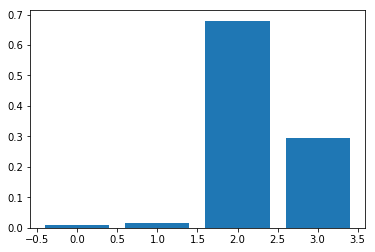

In [137]:
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot
#load data

model = XGBClassifier()
model.fit(X, y)
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()